## Overfitting
Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.
Underfitting
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

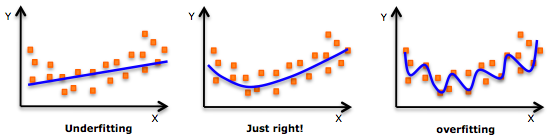

An example of overfitting, underfitting and a model that’s “just right!”

RMSE of test > RMSE of train => OVER FITTING of the data.
RMSE of test < RMSE of train => UNDER FITTING of the data.



In [76]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn import  linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [83]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [77]:
diabetes = load_diabetes()
iv = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # load the dataset as a pandas data frame
dv = diabetes.target #dv is a ndarray, since the pred values also will be ndarray
type(iv), type(dv)

(pandas.core.frame.DataFrame, numpy.ndarray)

## train_test_split(random sampling)

In [85]:
iv_train, iv_test, dv_train, dv_test=train_test_split(iv,dv,test_size=0.2)
model=linear_model.LinearRegression().fit(iv_train,dv_train)

dv_test_pred=model.predict(iv_test)
dv_train_pred=model.predict(iv_train)
#print(dv_test_pred[:5], type(dv_test_pred))
print('model score :',model.score(iv_test, dv_test))#calculate values for iv_test and compare with dv_test(actual) and tells score
print_score(dv_test, dv_test_pred, dv_train, dv_train_pred)

print('coeff', iv.columns)
print(model.coef_)
print('intercept',model.intercept_)

model score : 0.48365955076236095
accuracy 57.855738474764244
test: rmse 58.1381658146599
train:rmse 52.4223517259198
overfitting problem
coeff Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[ -14.3666421  -197.01007904  541.47655817  323.63226438 -626.50664327
  303.00458044   36.40290588  200.56441978  610.42155628   68.10149447]
intercept 151.6128606127841


In [26]:
dv_test.max()

346.0

## RMSE and mean

In [65]:
def mape(actual, predicted):
    mape_ = np.mean(np.abs(actual-predicted)/actual)
    return mape_*100

def rmse(actual, predicted):
    rmse_ = np.sqrt(mean_squared_error(actual,predicted))
    #rmse_ = np.sqrt(np.mean(np.square(actual-predicted)))
    return rmse_

def print_score(dv_test, dv_test_pred, dv_train, dv_train_pred):
    print('accuracy',100-mape(dv_test, dv_test_pred))#accuracy
    print('model score :',model.score(iv_test ,dv_test))
    print('model r2 score',r2_score(dv_test,dv_test_pred))
    test_deviation = rmse(dv_test, dv_test_pred)
    train_deviation = rmse(dv_train, dv_train_pred)
    print('test: rmse',test_deviation)#deviation of test data
    #print(rmse(dv_train, dv_train))#no deviation
    print('train:rmse',train_deviation)#deviation of train data


    if(test_deviation - train_deviation < 1 ):
        print ('Good model')
    else :
        if(test_deviation > train_deviation ):
            print('overfitting problem')
        else:
             print('underfitting problem')


Text(0, 0.5, 'Predictions')

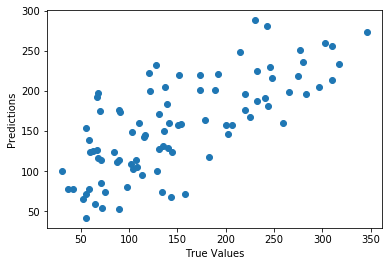

In [16]:
plt.scatter(dv_test, dv_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## cross validation using kfolds

In [66]:
diabetes = load_diabetes()
iv = pd.DataFrame(diabetes.data, columns=diabetes.feature_names).values #iv also an ndarray
dv = diabetes.target #dv is a ndarray, since the pred values also will be ndarray
type(iv), type(dv)
kf = KFold(n_splits = 3)
model=linear_model.LinearRegression()
for train_index,test_index in kf.split(range(iv.shape[0])):
    print(train_index[:5],test_index[:5])
    iv_train, iv_test, dv_train,dv_test = iv[train_index],iv[test_index],dv[train_index],dv[test_index]
    model.fit(iv_train,dv_train)

    dv_test_pred=model.predict(iv_test)
    dv_train_pred=model.predict(iv_train)
    #print(dv_test_pred[:5], type(dv_test_pred))
    print(model.score(iv_test, dv_test))#calculate values for iv_test and compare with dv_test(actual) and tells score
    print_score(dv_test, dv_test_pred, dv_train, dv_train_pred)

[148 149 150 151 152] [0 1 2 3 4]
0.46930577712901067
accuracy 59.76567446650057
test: rmse 55.083865829917535
train:rmse 53.30217034753155
overfitting problem
[0 1 2 3 4] [148 149 150 151 152]
0.48724993937707495
accuracy 58.07572223323408
test: rmse 57.03703680216377
train:rmse 52.089723515415436
overfitting problem
[0 1 2 3 4] [295 296 297 298 299]
0.5095525852352711
accuracy 62.88361527422511
test: rmse 52.858090378672095
train:rmse 54.13665796249799
Good model
